In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

# Train Model dari data asli & semua fitur

In [8]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.loc[:, df.columns != 'price_range']
y = df["price_range"]

## Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1,
                                       n_estimators=100, oob_score=True)
# Train Model
classifier_rf.fit(X_train, y_train)

# Evaluasi Model
rf_pred = classifier_rf.predict(X_test)

print(accuracy_score(y_test, rf_pred))

0.8625


## Decission Tree

In [11]:
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

dt_pred = dtree.predict(X_test)
print(accuracy_score(y_test, dt_pred))

0.8475


## Super Vektor Machine

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
sc = SVC(random_state=0)
sc.fit(X_train, y_train)

sc_pred = sc.predict(X_test)
print(accuracy_score(y_test, sc_pred))

0.9425


## Performa 

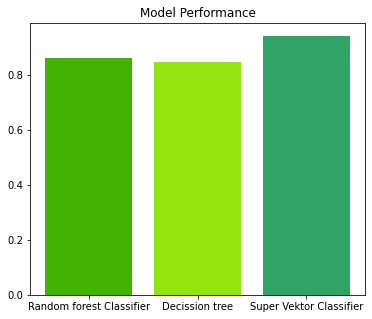

In [13]:
#plt.style.use('seaborn-darkgrid')

xlab = ['Random forest Classifier', 'Decission tree', 'Super Vektor Classifier']
ylab = [accuracy_score(y_test, rf_pred),accuracy_score(y_test, dt_pred), accuracy_score(y_test, sc_pred)]
colors = ['#42B300', '#94E411', '#31A465']

plt.figure(figsize=(6,5))
ax = plt.axes()
ax.set_facecolor("white")
plt.bar(xlab, ylab, color= colors) 

plt.title ('Model Performance')

plt.show()

# Exploratori Data Analysis

In [33]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Cek Korelasi

In [14]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


### Korelasi dengan label `price_range	`
1. RAM = 91%
2. BATTERY_POWER = 20%
3. PX_WIDTH ( Resolusi lebar ) = 16%
4. PX_HEIGHT ( Resolusi tinggi ) = 14%

kolom-kolom tersebut akan kami gunakan utntuk menjadi fitur input karena memiliki korelasi yang cukup besar \
Menurut **Jonathan Sarwono** Direktur Penjaminan Mutu di International Women University dalam artikel\
http://www.databee.id/2020/12/jenis-uji-korelasi.html \
Mengatakan kriteria korelasi sebagai berikut:
![gambar](jonatan.png)

In [15]:
df_train = df[['battery_power', 'ram', 'px_width', 'px_height', 'price_range']]
df_train.head()

,battery_power,ram,px_width,px_height,price_range
0,842,2549,756,20,1
1,1021,2631,1988,905,2
2,563,2603,1716,1263,2
3,615,2769,1786,1216,2
4,1821,1411,1212,1208,1


In [16]:
df_train.describe()

,battery_power,ram,px_width,px_height,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,2124.213000,1251.515500,645.108000,1.500000
std,439.418206,1084.732044,432.199447,443.780811,1.118314
min,501.000000,256.000000,500.000000,0.000000,0.000000
25%,851.750000,1207.500000,874.750000,282.750000,0.750000
50%,1226.000000,2146.500000,1247.000000,564.000000,1.500000
75%,1615.250000,3064.500000,1633.000000,947.250000,2.250000
max,1998.000000,3998.000000,1998.000000,1960.000000,3.000000


Di kolom `px_height` kami menemukan kejanggalan, dimana resolusi HP 0 px

In [17]:
df.loc[df['px_height']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


Kami memutuskan untuk mengahapus 2 baris ini karena informasi dari beberapa kolom di baris ini sangat ambigu seperti :
1. Kualitas HP berada di peringkat ke 3
2. Tidak memiliki bluetooth
3. Dan memiliki ram yang cukup besar
4. Memiliki battry_power yang besar
6. sc_width = 0
*Namun `px_height` = 0*\
Untuk yang kedua memiliki informasi berikut:
1. Battry_power kecil
2. mobile_wt besar
3. Namun price_range rendah

In [19]:
df_new = df_train.copy()
df_new.drop([1481,1933], inplace=True)
df_new.reset_index(drop=True, inplace=True) #reset index

In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  1998 non-null   int64
 1   ram            1998 non-null   int64
 2   px_width       1998 non-null   int64
 3   px_height      1998 non-null   int64
 4   price_range    1998 non-null   int64
dtypes: int64(5)
memory usage: 78.2 KB


## Visualisasi

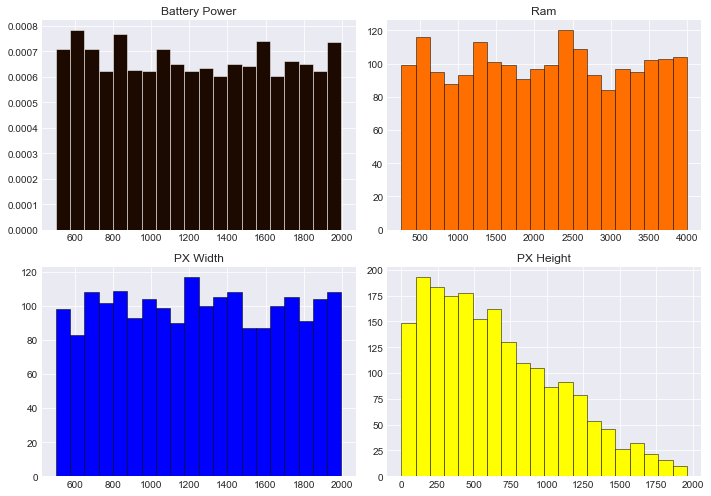

In [21]:
n_bins = 20
x1 = df_new['battery_power']
x2 = df_new['ram']
x3 = df_new['px_width']
x4 = df_new['px_height']
plt.style.use('seaborn-darkgrid')

# Visualisasi battry_power
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
ax0.hist(x1, n_bins, density=True, histtype='bar', color='#1C0A00', linewidth=0.5, edgecolor='white')
ax0.set_title('Battery Power')

# Visualisasi ram
ax1.hist(x2, n_bins, histtype='bar', color='#FF6F00', linewidth=0.5, edgecolor="black" )
ax1.set_title('Ram')

# Visualisasi px_width
ax2.hist(x3, n_bins, histtype='bar', color='blue', linewidth=0.5, edgecolor="black")
ax2.set_title('PX Width')

#Visualisasi px_height
ax3.hist(x4, n_bins, histtype='bar', color='yellow', linewidth=0.5, edgecolor="black")
ax3.set_title('PX Height')

fig.tight_layout()
plt.show()

### Cek Label bukan imbalance

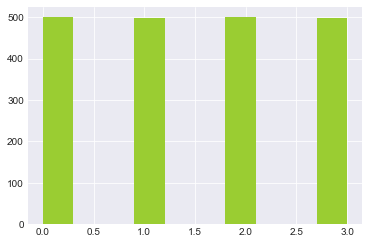

In [23]:
plt.hist(df_new['price_range'], color='yellowgreen')
plt.show()

In [24]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

# Train Model
## Random Forest Classifier

In [25]:
X = df_new.loc[:, df_new.columns != 'price_range']
y = df_new["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train Model
classifier_rf.fit(X_train, y_train)

# Evaluasi Model
rf_pred = classifier_rf.predict(X_test)

print(accuracy_score(y_test, rf_pred))

0.9025


## Decission Tree

In [26]:
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

dt_pred = dtree.predict(X_test)
print(accuracy_score(y_test, dt_pred))

0.845


## Super Vektor Machine

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
sc = SVC(random_state=0)
sc.fit(X_train, y_train)

sc_pred = sc.predict(X_test)
print(accuracy_score(y_test, sc_pred))

0.9575


## Performa 

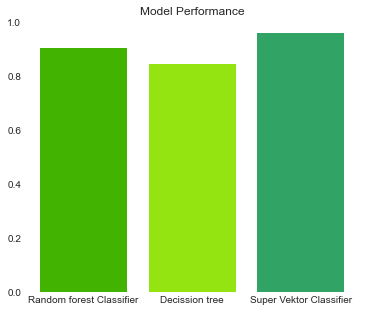

In [28]:
#plt.style.use('seaborn-darkgrid')

xlab = ['Random forest Classifier', 'Decission tree', 'Super Vektor Classifier']
ylab = [accuracy_score(y_test, rf_pred),accuracy_score(y_test, dt_pred), accuracy_score(y_test, sc_pred)]
colors = ['#42B300', '#94E411', '#31A465']

plt.figure(figsize=(6,5))
ax = plt.axes()
ax.set_facecolor("white")
plt.bar(xlab, ylab, color= colors) 

plt.title ('Model Performance')

plt.show()

# Hyper Parameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV

## Decission Tree

In [30]:
param_tree = {
    'criterion':['gini', 'entropy'],
    'max_depth':[1,2,5,10,50,100,None]
}

grid_dtree = GridSearchCV(estimator=dtree, 
                          param_grid=param_tree,
                          cv=10, n_jobs=1,
                         scoring="accuracy")

grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 10, 50, 100, None]},
             scoring='accuracy')

In [31]:
grid_dtree.best_score_

0.8710849056603773

In [32]:
dtree_best = grid_dtree.best_estimator_
dtree_best.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

## Random Forest Classifier

In [33]:
param_rf = {
    'max_depth': [1,2,3,5,10,20, None],
    'min_samples_leaf': [1,5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

grid_rf = GridSearchCV(estimator=classifier_rf,
                           param_grid=param_rf,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_rf.fit(X_train, y_train)

Fitting 4 folds for each of 294 candidates, totalling 1176 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, None],
                         'min_samples_leaf': [1, 5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [34]:
grid_rf.best_score_

0.9105200501253133

In [35]:
rf_best = grid_rf.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1,
                       random_state=42)

## Super Vektor Classifier

In [19]:
param_svc = {
    'kernel':['rbf', 'poly', 'sigmoid'],
    'C':[1.0, 5.0, 10.0, 50.0, 100.0],
    'gamma':['scale',1,0.1,0.01,0.001]
}

grid_svc = GridSearchCV(estimator=sc,
                       param_grid=param_svc,
                       n_jobs=1,
                       verbose=1,
                       scoring="accuracy")

grid_svc.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:  1.0min finished


GridSearchCV(estimator=SVC(random_state=0), n_jobs=1,
             param_grid={'C': [1.0, 5.0, 10.0, 50.0, 100.0],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [20]:
grid_svc.best_score_

0.968125

In [54]:
svc_best = grid_svc.best_estimator_
svc_best.fit(X_train, y_train)

SVC(C=100.0, kernel='poly', random_state=0)

# Evaluasi Model

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [37]:
y_tree = dtree_best.predict(X_test)

In [38]:
y_rf = rf_best.predict(X_test)

In [55]:
y_svc = svc_best.predict(X_test)

## Decission Tree

In [39]:
print(classification_report(y_test, y_tree))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       101
           1       0.85      0.89      0.87        91
           2       0.82      0.82      0.82       103
           3       0.88      0.87      0.88       105

    accuracy                           0.88       400
   macro avg       0.87      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



## Random Forest Classifier

In [40]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       101
           1       0.84      0.89      0.86        91
           2       0.87      0.83      0.85       103
           3       0.93      0.92      0.93       105

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



## Super Vektor Machine

In [58]:
print(classification_report(y_test, y_svc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       101
           1       0.94      0.96      0.95        91
           2       0.92      0.94      0.93       103
           3       0.98      0.95      0.97       105

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



## Performance

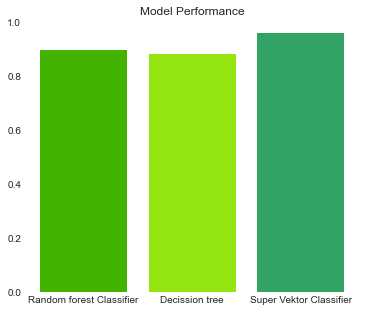

In [60]:
#plt.style.use('seaborn-darkgrid')

xlab = ['Random forest Classifier', 'Decission tree', 'Super Vektor Classifier']
ylab = [accuracy_score(y_test, y_rf),accuracy_score(y_test, y_tree), accuracy_score(y_test, y_svc)]
colors = ['#42B300', '#94E411', '#31A465']

plt.figure(figsize=(6,5))
ax = plt.axes()
ax.set_facecolor("white")
plt.bar(xlab, ylab, color= colors) 

plt.title ('Model Performance')

plt.show()

# Visualisasi Best Presformance
Test prediction with confucion matrix

<AxesSubplot:>

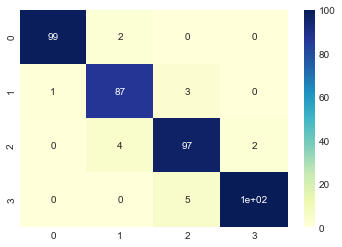

In [62]:
cm = confusion_matrix(y_test, y_svc)
sns.heatmap(cm, annot=True, cmap='YlGnBu')

In [45]:
99+1+2+87+4+3+97+5+2+102

402

In [44]:
y_test.count()

400

<AxesSubplot:>

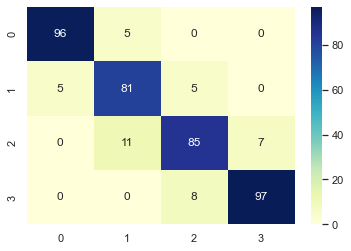

In [43]:
import seaborn as sns
sns.set()

cm = confusion_matrix(y_test, y_rf)
sns.heatmap(cm, annot=True, cmap='YlGnBu')

In [46]:
96+5+5+81+11+5+85+8+7+97

400

Model yang kami ambil pada akhirnya adalah 
### random Forest Classifier
Meskipun accuracy dari **Super vektor Classifier** Lebih bagus, namun ketepatan dalam memprediksi kurang wajar, dimana seharusnya jumlah `mobile` yang di prediksi sejumlah `400` namun SVC memprediksinya sebanyak `402`